# **Task 4.2P**

GitHub: https://github.com/StrikerXYZ/Knots-And-Crosses

In [1]:
#import sys

#import random
#from collections import defaultdict

In [27]:
import gym
env = gym.make('Blackjack-v0')

In [61]:
import numpy as np

def policy_b():
    return 0.5

def policy_greedy(actions):
    a = np.zeros_like(actions, dtype=float)
    a[np.argmax(actions)] = 1.0
    return a

def generate_episode(environment):
    episode = []
    state = environment.reset()
    probs = [0.5, 0.5]
    while True:
        action = np.random.choice(np.arange(2), p=probs)
        next_state, reward, done, info = environment.step(action)
        episode.append((state, action, reward))
        state = next_state
        if done:
            break
    return episode

In [62]:
def mc_off_policy(environment, num_episodes, generate_episode, gamma=1.0):
  
    N = defaultdict(lambda: np.zeros(env.action_space.n))
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    C = defaultdict(lambda: np.zeros(env.action_space.n))

    for i_episode in range(1, num_episodes+1):
      
        if i_episode % 1000 == 0:
            print("\rEpisode {}/{}.".format(i_episode, num_episodes), end="")
            
        episode = generate_episode(env)
        states, actions, rewards = zip(*episode)
        discounts = np.array([gamma**i for i in range(len(rewards)+1)]) 
        W = 1
        
        for i, state in enumerate(states): #every-visit
            G = sum(rewards[i:] * discounts[:-(1+i)])
            C[state][actions[i]] += W
            Q[state][actions[i]] += W/(C[state][actions[i]]) * (G - Q[state][actions[i]])
            if actions[i] !=  np.argmax(policy_greedy(Q[state])):
                break
            W = W * 1./policy_b()
            
    policy = dict((k,np.argmax(v)) for k, v in Q.items())
    return policy, Q

policy, Q = mc_off_policy(env, 500000, generate_episode)

Episode 500000/500000.

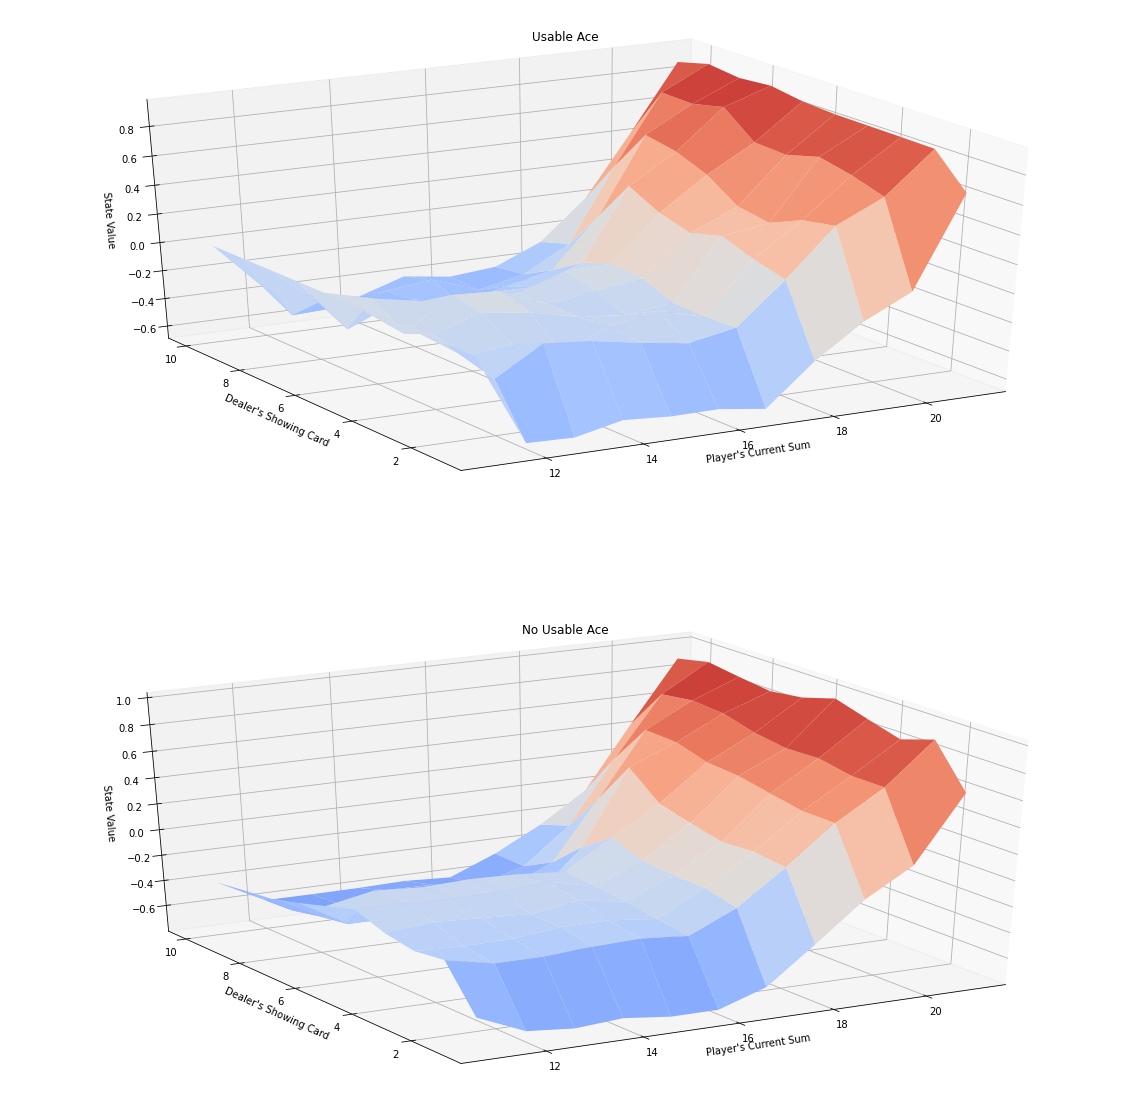

In [63]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_blackjack_values(V):

    def get_Z(x, y, usable_ace):
        if (x,y,usable_ace) in V:
            return V[x,y,usable_ace]
        else:
            return 0

    def get_figure(usable_ace, ax):
        x_range = np.arange(11, 22)
        y_range = np.arange(1, 11)
        X, Y = np.meshgrid(x_range, y_range)
        
        Z = np.array([get_Z(x,y,usable_ace) for x,y in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)

        surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.coolwarm, vmin=-1.0, vmax=1.0)
        ax.set_xlabel('Player\'s Current Sum')
        ax.set_ylabel('Dealer\'s Showing Card')
        ax.set_zlabel('State Value')
        ax.view_init(ax.elev, -120)

    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(211, projection='3d')
    ax.set_title('Usable Ace')
    get_figure(True, ax)
    ax = fig.add_subplot(212, projection='3d')
    ax.set_title('No Usable Ace')
    get_figure(False, ax)
    plt.show()
    
# plot the state-value function
V = dict((k, np.max(v)) for k, v in Q.items())
plot_blackjack_values(V)   

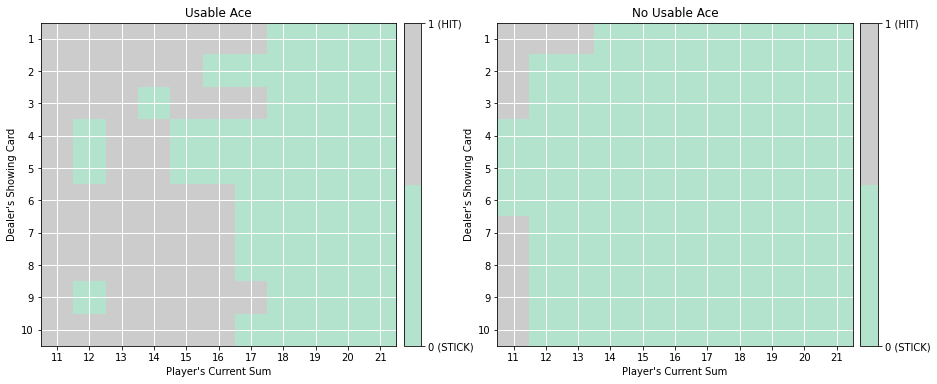

In [65]:
def plot_policy(policy):

    def get_Z(x, y, usable_ace):
        if (x,y,usable_ace) in policy:
            return policy[x,y,usable_ace]
        else:
            return 1

    def get_figure(usable_ace, ax):
        x_range = np.arange(11, 22)
        y_range = np.arange(10, 0, -1)
        X, Y = np.meshgrid(x_range, y_range)
        Z = np.array([[get_Z(x,y,usable_ace) for x in x_range] for y in y_range])
        surf = ax.imshow(Z, cmap=plt.get_cmap('Pastel2', 2), vmin=0, vmax=1, extent=[10.5, 21.5, 0.5, 10.5])
        plt.xticks(x_range)
        plt.yticks(y_range)
        plt.gca().invert_yaxis()
        ax.set_xlabel('Player\'s Current Sum')
        ax.set_ylabel('Dealer\'s Showing Card')
        ax.grid(color='w', linestyle='-', linewidth=1)
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.1)
        cbar = plt.colorbar(surf, ticks=[0,1], cax=cax)
        cbar.ax.set_yticklabels(['0 (STICK)','1 (HIT)'])
            
    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(121)
    ax.set_title('Usable Ace')
    get_figure(True, ax)
    ax = fig.add_subplot(122)
    ax.set_title('No Usable Ace')
    get_figure(False, ax)
    plt.show()

# plot the policy
plot_policy(policy)

In [66]:
nA=env.action_space.n
for i_episode in range(10):
    state = env.reset()
    while True:
        print(state)
        action = np.random.choice(np.arange(nA), p=get_probs(Q[state], 0, nA)) \
                                    if state in Q else env.action_space.sample()
        next_state, reward, done, info = env.step(action)
        state = next_state
        if done:
            print('Game has ended! Your Reward: ', reward)
            print('You won :)\n') if reward > 0 else print('You lost :(\n')
            break

(6, 10, False)
(8, 10, False)
Game has ended! Your Reward:  1.0
You won :)

(20, 3, False)
Game has ended! Your Reward:  1.0
You won :)

(18, 3, False)
Game has ended! Your Reward:  -1.0
You lost :(

(12, 5, False)
Game has ended! Your Reward:  1.0
You won :)

(18, 5, False)
Game has ended! Your Reward:  1.0
You won :)

(11, 4, False)
Game has ended! Your Reward:  -1.0
You lost :(

(13, 9, False)
Game has ended! Your Reward:  -1.0
You lost :(

(9, 6, False)
Game has ended! Your Reward:  -1.0
You lost :(

(13, 10, False)
Game has ended! Your Reward:  1.0
You won :)

(20, 10, False)
Game has ended! Your Reward:  1.0
You won :)



**On-Poicy**

pros:
- Training is faster
- Simpler system and easy to implement

cons:
- Agents must perform non optimal behaviour to learn all the states


**Off-Policy**

pros:
- Agents can explore without regression to state values being learnt
- Powerful system

cons:
- Takes longer to train

**Conclusion**

Off-Policy is generally better and more powerful than On-Policy. On-Policy is still good to consider first due to its simplicity and performance